<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data() #loading handwritten dataset from keras library
# the train and test datasets will be loaded in these variables [X_train, y_train, X_test, y_test]

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0] 
# in the output, 0 means black points

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

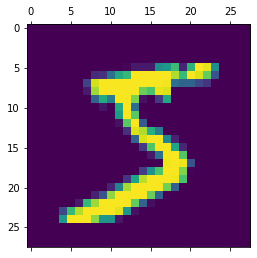

In [8]:
plt.matshow(X_train[0]) #plotting the first training image

In [9]:
y_train[0]

5

In [10]:
#scaling so that the values are between 0 and 1. This helps in getting more accuracy
X_train = X_train / 255
X_test = X_test / 255

In [11]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
X_train_flattened = X_train.reshape(len(X_train), 28*28) #reshape function to convert 2d arr to 1d arr
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [13]:
X_train_flattened.shape

(60000, 784)

In [14]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Very simple neural network with no hidden layers

In [15]:
model = keras.Sequential([  #keras.Sequential used to create simple neural network
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid') # 10 is the output shape which are the 10 neurons from 0-9, 784 is output shape(28*28)
])#keras.layers.Dense- all neurons in one layer connected to all neurons in other layer, activation function is sigmoid

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) #model.compile- to compile the model and pass a bunch of arguments.
#optimizer helps to reach the global optimum in an efficient way, loss funtion can be found in tensorflow documentation,
#metrics=['accuracy'] helps to make model more accurate

model.fit(X_train_flattened, y_train, epochs=5) #epochs is the iteration number for which the neural network will run the traning

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4892 - accuracy: 0.8776
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3061 - accuracy: 0.9159
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2851 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2743 - accuracy: 0.9243
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2672 - accuracy: 0.9264


In [16]:
model.evaluate(X_test_flattened, y_test) #evaluating accuracy on test dataset

313/313 [==============================] - 1s 2ms/step - loss: 0.2672 - accuracy: 0.9273


[0.2672004699707031, 0.927299976348877]

In [17]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0] 
#10 scores are output for the 10 values

array([1.4695394e-05, 6.0366649e-11, 5.6309946e-05, 1.2600839e-02,
       1.3820780e-06, 9.4375995e-05, 9.2727681e-10, 6.3469744e-01,
       6.9182934e-05, 1.1449158e-03], dtype=float32)

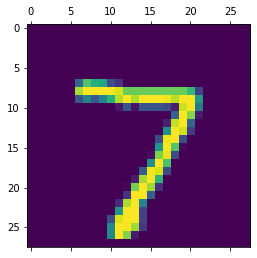

In [18]:
plt.matshow(X_test[0]) # to show the first image

**np.argmax finds a maximum element  from an array and returns the index of it**

In [19]:
np.argmax(y_predicted[0]) #for seeing the maximum score

7

In [20]:
y_predicted_labels = [np.argmax(i) for i in y_predicted] #for calling all the elements in np.argmax

In [21]:
y_predicted_labels[:5] #getting the first 5 predictions

[7, 2, 1, 0, 4]

In [22]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels) # in tf, there is a module math that has confusion matrix
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    2,    2,    0,    5,   10,    2,    2,    0],
       [   0, 1102,    5,    2,    0,    1,    4,    2,   19,    0],
       [   3,    4,  940,   14,    8,    3,   12,    8,   35,    5],
       [   2,    0,   21,  927,    1,   19,    2,    8,   22,    8],
       [   1,    1,    3,    1,  919,    0,   10,    3,    9,   35],
       [  10,    2,    4,   34,   11,  774,   18,    3,   29,    7],
       [   7,    3,    6,    1,    7,    9,  920,    2,    3,    0],
       [   1,    5,   28,    8,    8,    1,    0,  921,    3,   53],
       [   6,    2,    7,   18,    9,   26,   11,    6,  877,   12],
       [  10,    5,    1,    9,   27,    5,    0,    7,    9,  936]])>

Text(69.0, 0.5, 'Truth')

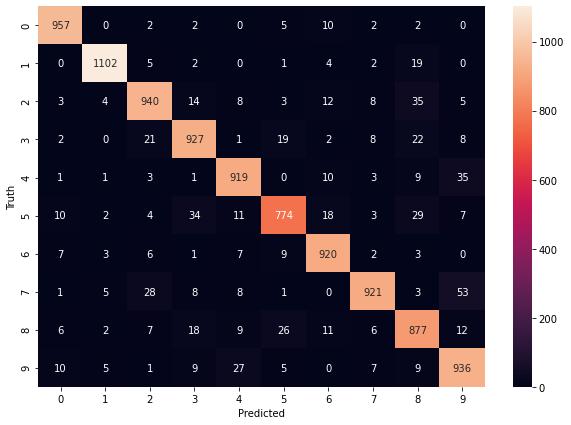

In [23]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using hidden layer

In [24]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'), #this is hidden layer genersation, 100 id given by trial&error
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2837 - accuracy: 0.9222
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1310 - accuracy: 0.9620
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0925 - accuracy: 0.9725
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0720 - accuracy: 0.9790
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0575 - accuracy: 0.9831


In [25]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0810 - accuracy: 0.9753


[0.08102717250585556, 0.9753000140190125]

Text(69.0, 0.5, 'Truth')

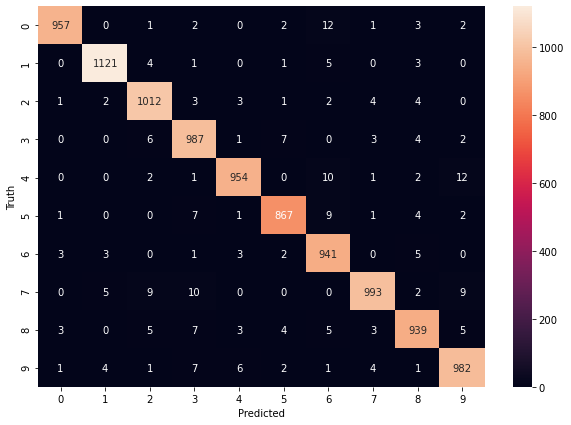

In [26]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #Using Flatten layer so that we don't have to call .reshape on input dataset
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2912 - accuracy: 0.9190
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1367 - accuracy: 0.9599
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0978 - accuracy: 0.9711
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0771 - accuracy: 0.9767
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0621 - accuracy: 0.9810
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0514 - accuracy: 0.9847
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0426 - accuracy: 0.9872
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0359 - accuracy: 0.9888
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0296 - accuracy: 0.9912
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.026

In [28]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0800 - accuracy: 0.9777


[0.0799536406993866, 0.9776999950408936]